In [1]:
import numpy as np
import pandas as pd


In [ ]:
#In this assignment students need to predict whether a person makes over 50K per year or not from classic
#adult dataset using XGBoost.
#((AGE>16) &&
#(GI>100) && (FNLWGT>1)&& (HRSWK>0))

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, sep=',\s', na_values=["?"])

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None, sep=',\s', na_values=["?"])

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']



C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
 train_set.wage_class.value_counts()

<=50K    24720
>50K      7841
Name: wage_class, dtype: int64

In [4]:
train_set.workclass.isnull().sum()

1836

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029907C33A20>]],
      dtype=object)

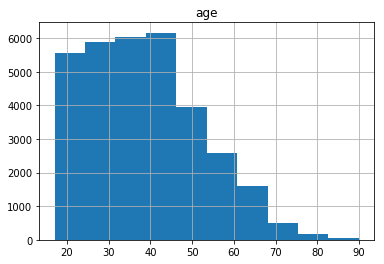

In [62]:
train_set.hist('age')

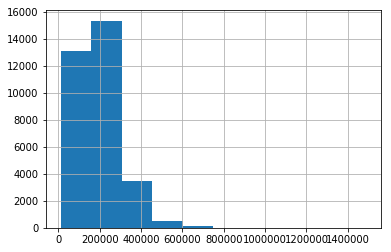

In [63]:
train_set.fnlwgt.hist()

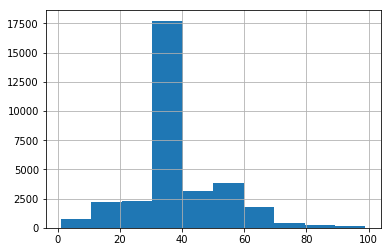

In [64]:
train_set.hours_per_week.hist()

In [74]:
#train_set = train_set[(age>16) && (fnlwgt>1) && (hours_per_week>0)]
#train set
train_set_2 = train_set[train_set['age']>16]
train_set_2 = train_set[train_set['fnlwgt']>1]
train_set_2 = train_set[train_set['hours_per_week']>0]
test_set = train_set_2
#test set
test_set_2 = test_set[train_set['age']>16]
test_set_2 = test_set[train_set['fnlwgt']>1]
test_set_2 = test_set[train_set['hours_per_week']>0]
test_set = test_set_2

In [75]:
train_set.shape

(32561, 15)

In [6]:
train_set.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [7]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [8]:
train_set['workclass'] = train_set.workclass.fillna(value='Private')
test_set['workclass'] = test_set.workclass.fillna(value='Private')

In [10]:
train_set['occupation'] = train_set.occupation.fillna(value='other-na')
test_set['occupation'] = test_set.occupation.fillna(value='other-na')

In [11]:
train_set['native_country'] = train_set.native_country.fillna(value='United-States')
test_set['native_country'] = test_set.native_country.fillna(value='United-States')

In [12]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [13]:
X = train_set.iloc[:, :-1]

In [14]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [15]:
X.shape

(32561, 14)

In [16]:
Y = train_set.iloc[:, -1]

In [17]:
Y.shape

(32561,)

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [19]:
label_wc = LabelEncoder()

In [20]:
X['workclass'] = label_wc.fit_transform(X['workclass'])

In [21]:
X.workclass.head()

0    6
1    5
2    3
3    3
4    3
Name: workclass, dtype: int64

In [22]:
label_oc = LabelEncoder()
X['occupation'] = label_oc.fit_transform(X['occupation'])
X.occupation.head()

0    0
1    3
2    5
3    5
4    9
Name: occupation, dtype: int64

In [23]:
label_ms = LabelEncoder()
X['marital_status'] = label_ms.fit_transform(X['marital_status'])

In [24]:
label_rel = LabelEncoder()
X['relationship'] = label_rel.fit_transform(X['relationship'])

In [25]:
label_race = LabelEncoder()
X['race'] = label_race.fit_transform(X['race'])

In [26]:
label_sex = LabelEncoder()
X['sex'] = label_sex.fit_transform(X['sex'])

In [27]:
label_nc = LabelEncoder()
X['native_country'] = label_nc.fit_transform(X['native_country'])

In [29]:
X = X.drop('education', axis=1)
#X= X.drop('worclass', axis=1)
X.shape

(32561, 13)

In [30]:
X.workclass.value_counts()

3    24532
5     2541
1     2093
6     1298
4     1116
0      960
7       14
2        7
Name: workclass, dtype: int64

In [31]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [34]:
onehot_wc = OneHotEncoder(categorical_features=[1])
X_one =  onehot_wc.fit_transform(X).toarray()
X_one[0:10]

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 3.90000e+01, 7.75160e+04,
        1.30000e+01, 4.00000e+00, 0.00000e+00, 1.00000e+00, 4.00000e+00,
        1.00000e+00, 2.17400e+03, 0.00000e+00, 4.00000e+01, 3.80000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+01, 8.33110e+04,
        1.30000e+01, 2.00000e+00, 3.00000e+00, 0.00000e+00, 4.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.30000e+01, 3.80000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.80000e+01, 2.15646e+05,
        9.00000e+00, 0.00000e+00, 5.00000e+00, 1.00000e+00, 4.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+01, 3.80000e+01],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 5

In [35]:
onehot_en = OneHotEncoder(categorical_features=[3])
X_one =  onehot_en.fit_transform(X).toarray()


In [36]:
onehot_ms = OneHotEncoder(categorical_features=[4])
X_one =  onehot_ms.fit_transform(X_one).toarray()


In [37]:
onehot_oc = OneHotEncoder(categorical_features=[5])
X_one =  onehot_oc.fit_transform(X_one).toarray()


In [38]:
onehot_re = OneHotEncoder(categorical_features=[6])
X_one =  onehot_re.fit_transform(X_one).toarray()


In [39]:
onehot_ra = OneHotEncoder(categorical_features=[7])
X_one =  onehot_ra.fit_transform(X_one).toarray()


In [ ]:
onehot_se = OneHotEncoder(categorical_features=[8])
X_one =  onehot_se.fit_transform(X_one).toarray()


In [40]:
onehot_nc = OneHotEncoder(categorical_features=[-1])
X_one =  onehot_nc.fit_transform(X_one).toarray()
X_one[0:20]

array([[   0.,    0.,    0., ..., 2174.,    0.,   40.],
       [   0.,    0.,    0., ...,    0.,    0.,   13.],
       [   0.,    0.,    0., ...,    0.,    0.,   40.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,   40.],
       [   0.,    0.,    0., ...,    0.,    0.,   50.],
       [   0.,    0.,    0., ...,    0.,    0.,   45.]])

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_one, Y, test_size=0.2, random_state=1)

In [42]:
x_test.shape

(6513, 72)

In [43]:
import xgboost
booster = xgboost.XGBClassifier()
booster.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [44]:
y_pred = booster.predict(x_test)

C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
y_pred.shape

(6513,)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[4789,  237],
       [ 650,  837]], dtype=int64)

In [50]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = booster, X = x_train, y = y_train, cv=10)
xgb_mean = accuracies.mean()
xgb_std = accuracies.std()

C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\siddam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\labe

In [49]:
accuracies

array([0.86339217, 0.85571757, 0.86991558, 0.85379893, 0.86328725,
       0.85829493, 0.8655914 , 0.85560676, 0.86827957, 0.86175115])

In [58]:
xgb_mean = xgb_mean.astype(str)
print('XGB Average Accuracy is: '+ xgb_mean)

XGB Average Accuracy is: 0.8615635311634617
